# Project Work - Try with Median - Metaboloma
This project is composed from two dataset:
- Lipidoma
- Metaboloma

The aim of this project is identify bio-markers that allow to distinguish the evolution of pathology (HCV). We have 3 several class of patient:
- LC: Hepatocellular carcinoma
- HC: Hepatitis C virus
- MC: Mixed Cryoglobulinemia disease

## Read Data Set

In [1]:
import pandas as pd
import numpy as np

data_metaboloma_transpose = pd.read_excel("../../DataSet PAscale/Metaboloma.xlsx")
data_metaboloma_transpose

data_metaboloma = data_metaboloma_transpose.T

data_metaboloma.columns = data_metaboloma_transpose["Sample"]

data_metaboloma = data_metaboloma.iloc[1:]

data_metaboloma.columns = list(data_metaboloma.columns)

df_y_metaboloma = data_metaboloma["Label"].iloc[1:]

mz_metaboloma = data_metaboloma.iloc[0:1,1:]

df_y_qc_metaboloma = data_metaboloma["Label"].iloc[1:5]

df_x_metaboloma = data_metaboloma.iloc[1:,1:]

df_qc_metaboloma = data_metaboloma.iloc[1:5]

name_samples_metaboloma = df_x_metaboloma.transpose().columns

df_x_metaboloma

,Aminooctanoic acid,Androsterone sulfate,Arachidonic acid,Arginine,Asymmetric dimethylarginine,Bilirubin,Biliverdin,CAR 10:0,CAR 10:1,CAR 14:1,...,Paraxanthine,Phenylacetylglutamine,Pregnenolone sulfate,Proline betaine,Proline-hydroxyproline,Pseudouridine,Sphingosine 1-phosphate,Taurine,Tyrosine,Urobilinogen
260522_QC 3uL POS_BA2_1_5281,1724.36,36169.2,1791.64,20815.31,18192.06,2352.46,3163.69,41893.68,20112.96,13712.3,...,25095.15,11855.6,7784.79,63059.26,4441.94,2532.3,370.53,4797.76,1558.59,10739.38
260522_QC 3uL POS_BA2_1_5282,2069.33,NaN,2686.61,18423.92,16191.01,2867.38,2492.91,45853.77,22089.3,13680.64,...,26118.44,12851.29,8463.23,59114.21,4312.64,2706.49,547.05,4898.68,2369.34,10762.16
260522_QC 3uL POS_BA2_1_5292,2345.91,36445.49,1934.77,18134.45,16500.87,2068.57,2921.83,40248.9,20480.08,14949.6,...,34265.84,16378.96,9249.89,58846.07,4322.24,2988.95,480.28,4262.75,1780.54,10415.68
260522_QC 3uL POS_BA2_1_5336,2800.96,48072.08,2338.6,NaN,18163.49,1626.92,2426.26,38664.73,19663.5,14294.55,...,32695.32,13010.66,11141.93,68917.94,4249.72,2369.77,604.94,3894.54,1470.27,8576.66
260522_LC 203_POS_BA3_1_5284,5593.8,8391.23,2555.37,23541.71,25006.24,20973.29,11433.02,101834.45,27948.15,20205.67,...,59383.52,24228.53,2319.81,11698.76,5601.15,2336.02,920.18,4491.4,3273.71,893.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260522_HC 019_POS_GE8_1_5367,5082.13,71447.89,2195.48,11581.65,11746.75,2378.9,1772.48,62455.74,40757.8,11739.01,...,95740.05,22130.71,10216.19,16960.19,4379.81,2054.49,1658.98,3282.69,1720.11,1485.28
260522_HC 020_POS_RA1_1_5368,2560.8,6213.98,2240.19,19817.97,15440.64,3008.33,2334.52,119343.25,55534.63,24819.22,...,43309.66,27068.33,5982.11,8025.66,7901.4,3315.97,981.54,2643.4,2377.65,2736.38
260522_HC 021_POS_RA7_1_5375,4378.68,NaN,826.61,7058.17,14720.29,5098.76,3060.99,160972.44,40101.87,12816.22,...,31221.78,27424.89,3857.13,74973.58,4896.98,3970.25,766.7,3415.74,2796.12,8934.25
260522_HC 022_POS_RA8_1_5376,3584.63,106970.46,2322.56,16072.35,15300.35,8262.55,4217.25,75388.84,25210.08,13802.58,...,99036.48,16814.4,10656.49,45065.14,2711.33,2925.63,587.06,4154.92,1176.92,3078.14


Choose colors for each class

In [2]:
# color mapping to use in plot
color_mapping = {
    'LC': 'red',
    'MC': 'green',
    'HC' : 'orange',
    'QC' : 'purple'
}

colors = [color_mapping[label] for label in df_y_metaboloma]

## View the data

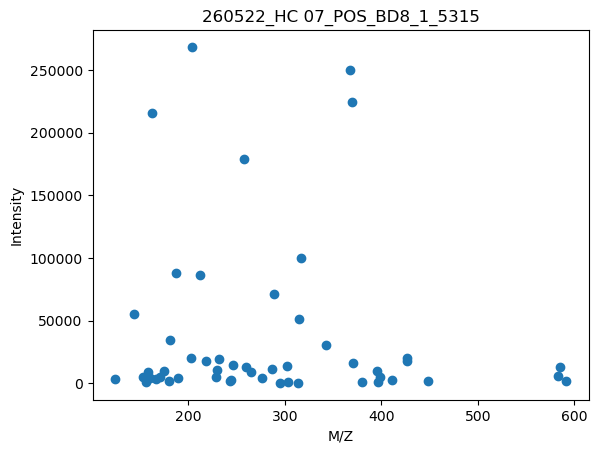

260522_HC 07_POS_BD8_1_5315    268301.44
dtype: object


In [3]:
import matplotlib.pyplot as plt

plt.scatter(mz_metaboloma, df_x_metaboloma.iloc[89:90])
plt.xlabel("M/Z")
plt.ylabel("Intensity")
plt.title("260522_HC 07_POS_BD8_1_5315")
plt.show()
# axis=1 sono le righe; axis=0 sono le colonne
print(df_x_metaboloma[89:90].max(axis=1))


Save a copy of original dataset and after we filled the Nan value

In [4]:
df_x_metaboloma_original = df_x_metaboloma.copy()
for column in df_x_metaboloma.columns:
    df_x_metaboloma.loc[:,column] = df_x_metaboloma[column].fillna((np.nanmin(df_x_metaboloma[column]))/5)
print(df_x_metaboloma.isna().sum().sort_values(ascending=False))

Aminooctanoic acid                    0
Dehydroepiandrosterone sulfate        0
Dodecenoylcarnitine                   0
FA 18:1+1O                            0
Glycerophosphocholine                 0
Histidine                             0
Homoarginine                          0
Hydroperoxylinoleic acid              0
Hydroxyanthranilic acid               0
Hydroxypregnenolone sulfate           0
INDOLE-ACETALDEHYDE                   0
Indoxyl sulfate                       0
Isoleucylproline                      0
Methylguanine                         0
Methylhistidine                       0
Methylpyridonecarboxamide             0
Paraxanthine                          0
Phenylacetylglutamine                 0
Pregnenolone sulfate                  0
Proline betaine                       0
Proline-hydroxyproline                0
Pseudouridine                         0
Sphingosine 1-phosphate               0
Taurine                               0
Tyrosine                              0


View the data in a bidimensional space, thanks to PCA

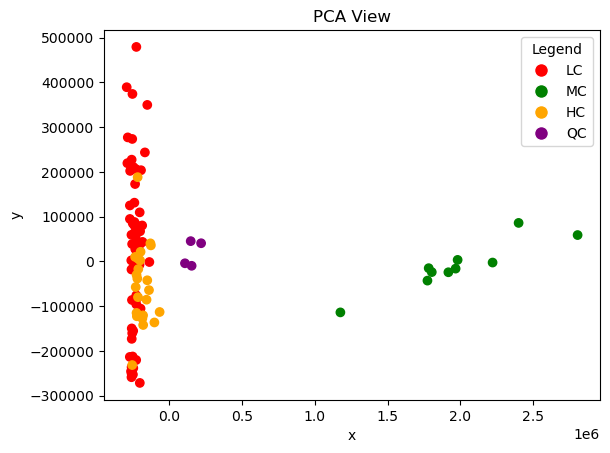

In [5]:
from sklearn.decomposition import PCA
pca_view = PCA(n_components=2)

scores_view = pca_view.fit_transform(df_x_metaboloma,df_y_metaboloma)


plt.scatter(scores_view[:, 0], scores_view[:, 1], c=colors)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', label='LC', markerfacecolor='red', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='MC', markerfacecolor='green', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='HC', markerfacecolor='orange', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='QC', markerfacecolor='purple', markersize=10),
], title='Legend')
plt.title('PCA View')
plt.show()



LDA

Using also LDA to view the data in a bidimensional space, to see the effect of this further method.

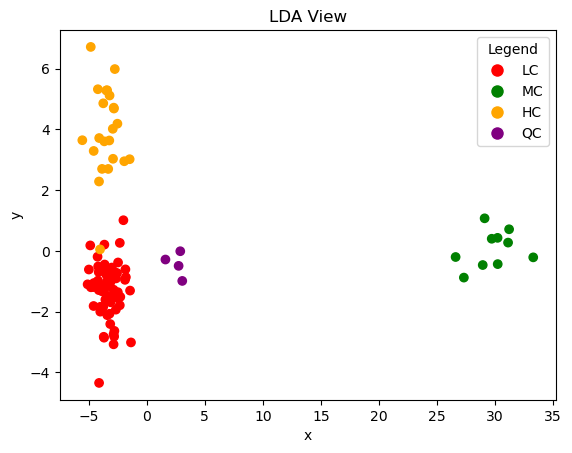

In [6]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda_fit_median = LDA(n_components=2)
lda_scores = lda_fit_median.fit_transform(df_x_metaboloma,df_y_metaboloma)

plt.scatter(lda_scores[:, 0], lda_scores[:, 1], c=colors)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', label='LC', markerfacecolor='red', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='MC', markerfacecolor='green', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='HC', markerfacecolor='orange', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='QC', markerfacecolor='purple', markersize=10),
], title='Legend')
plt.title('LDA View')
plt.show()

## Median Normalization

We find the median value in the original dataset, before to fill the Nan value

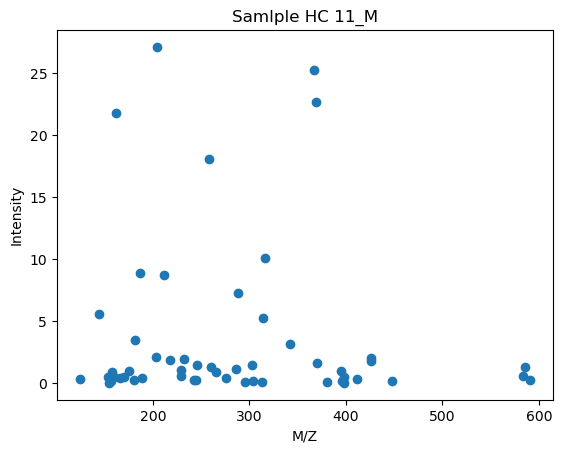

260522_HC 07_POS_BD8_1_5315    27.10759
dtype: object

In [7]:
median_original = df_x_metaboloma_original.median(axis=1, skipna=True)
df_x_metaboloma_median = df_x_metaboloma.div(median_original,axis=0)

plt.scatter(mz_metaboloma, df_x_metaboloma_median.iloc[89:90])
plt.xlabel("M/Z")
plt.ylabel("Intensity")
plt.title("Samlple HC 11_M")
plt.show()
# axis=1 sono le righe; axis=0 sono le colonne
df_x_metaboloma_median[89:90].max(axis=1)

View after normalization

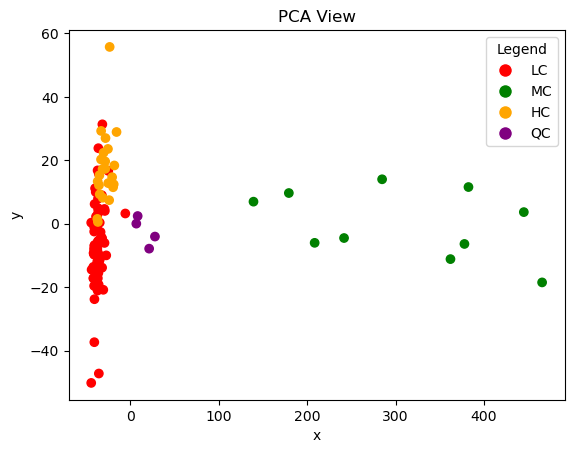

In [8]:
pca_view = PCA(n_components=2)

scores_view = pca_view.fit_transform(df_x_metaboloma_median,df_y_metaboloma)


plt.scatter(scores_view[:, 0], scores_view[:, 1], c=colors)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', label='LC', markerfacecolor='red', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='MC', markerfacecolor='green', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='HC', markerfacecolor='orange', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='QC', markerfacecolor='purple', markersize=10),
], title='Legend')
plt.title('PCA View')
plt.show()

After this visualization, I could just stop here because the Quality Control samples are most near to LC and HC samples and for this reason I could say that this normalization is not enough right.

LDA

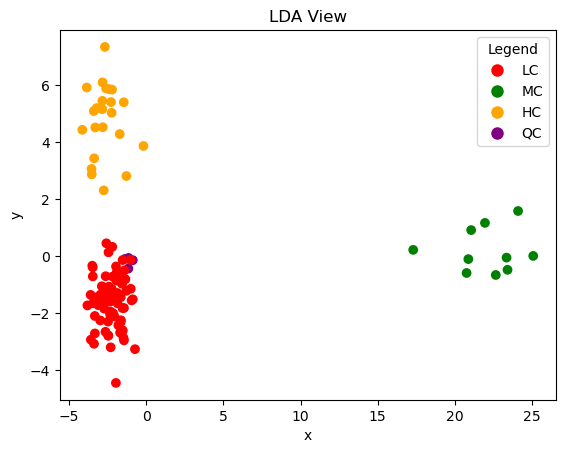

In [9]:
lda_fit_tic = LDA(n_components=2)
lda_scores = lda_fit_tic.fit_transform(df_x_metaboloma_median,df_y_metaboloma)

plt.scatter(lda_scores[:, 0], lda_scores[:, 1], c=colors)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', label='LC', markerfacecolor='red', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='MC', markerfacecolor='green', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='HC', markerfacecolor='orange', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='QC', markerfacecolor='purple', markersize=10),
], title='Legend')
plt.title('LDA View')
plt.show()

Also LDA return the same result

## Drop Outlier

In [10]:
drop = []

LC

In [11]:
## codice prova con la distanza di mahalonobis
lc = scores_view[4:73,:]

mean_lc = np.mean(lc,axis=0)
cov_matrix = np.cov(lc,rowvar=False)

mahalanobis_distance_lc = []

for point in lc:
    diff = point - mean_lc
    distance = np.sqrt(np.dot(np.dot(diff, np.linalg.inv(cov_matrix)), diff))
    mahalanobis_distance_lc.append(distance)
    
# print(mahalanobis_distance_lc)

outlier_lc = pd.DataFrame({"Sample":df_x_metaboloma_median.index[4:73],"outlier":mahalanobis_distance_lc}).sort_values(by="outlier",ascending=False)
outlier_lc

,Sample,outlier
67,260522_LC 443_POS_RC7_1_5391,5.652574
34,260522_LC 365_POS_GC2_1_5344,3.268460
29,260522_LC 351_POS_GB2_1_5334,3.173164
60,260522_LC 431_POS_RB8_1_5384,2.679423
28,260522_LC 350_POS_GA6_1_5330,2.341467
...,...,...
51,260522_LC 399_POS_RA4_1_5372,0.282470
9,260522_LC 270_POS_BC2_1_5301,0.255224
12,260522_LC 306_POS_BC5_1_5304,0.210954
25,260522_LC 341_POS_GA3_1_5327,0.076484


In [12]:
from scipy.stats import chi2

alpha = 0.05
threshold_distance_mahalanobis = chi2.ppf(1 - alpha, df = 2)
threshold_distance_mahalanobis

5.991464547107979

In [13]:
mean_out_lc = outlier_lc["outlier"].mean(axis=0)
temp = []
for sample,elem in outlier_lc.values:
    if elem > threshold_distance_mahalanobis:
        drop.append(sample)
        temp.append(sample)

outlier_lc = outlier_lc.drop(outlier_lc[outlier_lc["Sample"].isin(temp)].index)        

drop

[]

MC

In [14]:
mc = scores_view[73:83,:]

mean_mc = np.mean(mc,axis=0)
cov_matrix = np.cov(mc,rowvar=False)

mahalanobis_distance_mc = []

for point in mc:
    diff = point - mean_mc
    distance = np.sqrt(np.dot(np.dot(diff, np.linalg.inv(cov_matrix)), diff))
    mahalanobis_distance_mc.append(distance)
    
# print(mahalanobis_distance_mc)

outlier_mc = pd.DataFrame({"Sample":df_x_metaboloma_median.index[73:83],"outlier":mahalanobis_distance_mc}).sort_values(by="outlier",ascending=False)
outlier_mc

,Sample,outlier
0,260522_MC 04_POS_BA7_1_5288,1.866906
8,260522_MC 17_POS_GD7_1_5358,1.597644
9,260522_MC 18_POS_GE7_1_5366,1.498989
2,260522_MC 09_POS_BC7_1_5306,1.487457
5,260522_MC 13_POS_GA7_1_5331,1.348237
1,260522_MC 05_POS_BB7_1_5298,1.322657
7,260522_MC 15_POS_GC7_1_5349,1.235609
6,260522_MC 14_POS_GB7_1_5341,1.028275
3,260522_MC 10_POS_BD7_1_5314,0.919059
4,260522_MC 11_POS_BE7_1_5323,0.711889


In [15]:
mean_out_mc = outlier_mc["outlier"].mean(axis=0)
temp = []
for sample,elem in outlier_mc.values:
    if elem > threshold_distance_mahalanobis:
        drop.append(sample)
        temp.append(sample)
        
outlier_mc = outlier_mc.drop(outlier_mc[outlier_mc["Sample"].isin(temp)].index)

drop

[]

HC

In [16]:
hc = scores_view[83:106,:]

mean_hc = np.mean(hc,axis=0)
cov_matrix = np.cov(hc,rowvar=False)

mahalanobis_distance_hc = []

for point in hc:
    diff = point - mean_hc
    distance = np.sqrt(np.dot(np.dot(diff, np.linalg.inv(cov_matrix)), diff))
    mahalanobis_distance_hc.append(distance)
    
# print(mahalanobis_distance_hc)

outlier_hc = pd.DataFrame({"Sample":df_x_metaboloma_median.index[83:106],"outlier":mahalanobis_distance_hc}).sort_values(by="outlier",ascending=False)
outlier_hc

,Sample,outlier
7,260522_HC 08_POS_BE1_1_5316,3.408756
1,260522_HC 02_POS_BB1_1_5290,1.937382
22,260522_HC 023_POS_RB1_1_5377,1.711246
5,260522_HC 06_POS_BD1_1_5308,1.686164
19,260522_HC 020_POS_RA1_1_5368,1.682996
2,260522_HC 03_POS_BB8_1_5299,1.651962
10,260522_HC 011_POS_GA8_1_5332,1.582883
16,260522_HC 017_POS_GD8_1_5359,1.537972
11,260522_HC 012_POS_GB1_1_5333,1.320638
4,260522_HC 05_POS_BC8_1_5307,1.320473


In [17]:
mean_out_hc = outlier_hc["outlier"].mean(axis=0)

temp = []
for sample,elem in outlier_hc.values:
    if elem > threshold_distance_mahalanobis:
        drop.append(sample)
        temp.append(sample)

outlier_hc = outlier_hc.drop(outlier_hc[outlier_hc["Sample"].isin(temp)].index) 
drop

[]

Delete and Visualization of new data

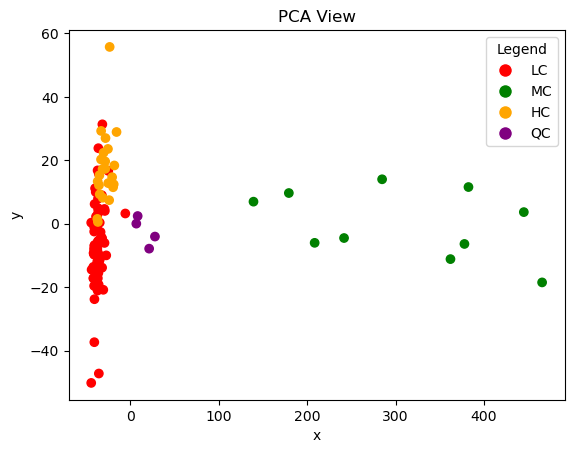

In [18]:
df_score_view = pd.DataFrame({"Sample":df_x_metaboloma_median.index,"Score View X":scores_view[:,0], "Score View Y":scores_view[:,1]})

index_drop = df_score_view[df_score_view["Sample"].isin(drop)].index
colors_after_drop = np.delete(colors,index_drop)
df_score_view = df_score_view.drop(index_drop)
df_score_view

plt.scatter(df_score_view["Score View X"], df_score_view["Score View Y"], c=colors_after_drop)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', label='LC', markerfacecolor='red', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='MC', markerfacecolor='green', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='HC', markerfacecolor='orange', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='QC', markerfacecolor='purple', markersize=10),
], title='Legend')
plt.title('PCA View')
plt.show()

## Split in Train and in Test

Label
LC    69
HC    23
MC    10
Name: count, dtype: int64
Label
LC    69
HC    23
MC    10
Name: count, dtype: int64


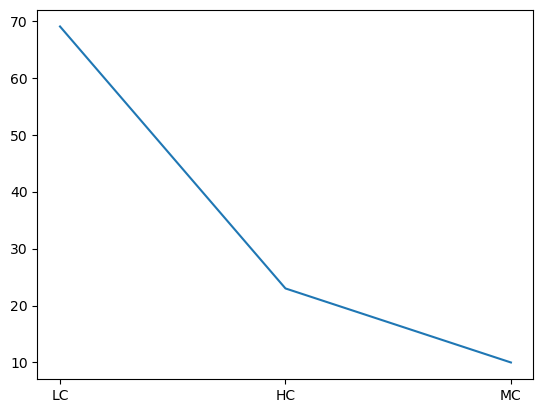

In [19]:
df_x_metaboloma_median_noqc = df_x_metaboloma_median.iloc[4:]
df_y_metaboloma_noqc = df_y_metaboloma.iloc[4:]

print(df_y_metaboloma_noqc.value_counts())

x_median = df_x_metaboloma_median_noqc.copy()
y_median = df_y_metaboloma_noqc.copy()

x_median = x_median.drop(drop)
y_median = y_median.drop(drop)
print(y_median.value_counts())
plt.plot(df_y_metaboloma_noqc.value_counts())
plt.show()

##### Division in test and train

In [20]:
train_size = 0.7

train_size_lc = int(len(outlier_lc)*train_size)
train_size_mc = int(len(outlier_mc)*train_size)
train_size_hc = int(len(outlier_hc)*train_size)

list_train_lc_x = x_median.loc[outlier_lc["Sample"].iloc[0:train_size_lc]]
list_train_lc_y = y_median.loc[outlier_lc["Sample"].iloc[0:train_size_lc]]

list_train_mc_x = x_median.loc[outlier_mc["Sample"].iloc[0:train_size_mc]]
list_train_mc_y = y_median.loc[outlier_mc["Sample"].iloc[0:train_size_mc]]

list_train_hc_x = x_median.loc[outlier_hc["Sample"].iloc[0:train_size_hc]]
list_train_hc_y = y_median.loc[outlier_hc["Sample"].iloc[0:train_size_hc]]

x_train_median = pd.concat([list_train_lc_x,list_train_mc_x,list_train_hc_x])
y_train_median = pd.concat([list_train_lc_y,list_train_mc_y,list_train_hc_y])
y_train_median

260522_LC 443_POS_RC7_1_5391    LC
260522_LC 365_POS_GC2_1_5344    LC
260522_LC 351_POS_GB2_1_5334    LC
260522_LC 431_POS_RB8_1_5384    LC
260522_LC 350_POS_GA6_1_5330    LC
                                ..
260522_HC 021_POS_RA7_1_5375    HC
260522_HC 018_POS_GE1_1_5360    HC
260522_HC 016_POS_GD1_1_5351    HC
260522_HC 09_POS_BE8_1_5324     HC
260522_HC 013_POS_GB8_1_5342    HC
Name: Label, Length: 71, dtype: object

In [21]:
x_test_median = x_median.loc[~x_median.isin(x_train_median.to_dict(orient='list')).all(axis=1)]
y_test_median = y_median[~y_median.index.isin(y_train_median.index)]
len(y_test_median)

31

In [22]:
name_sample_train_median = x_train_median.transpose().columns
name_sample_test_median = x_test_median.transpose().columns

#### Save the mean and standard deviation of the training set

In [23]:
mean_median= x_train_median.mean(axis=0)
std_median = x_train_median.std(axis=0)

## Dimensionality Reduction

#### Elbow Graph

In [24]:
from sklearn.decomposition import PCA

varianza_spiegata_median = []
n_componenti_median = np.arange(1, min(x_train_median.shape[0],x_train_median.shape[1]))

for n in n_componenti_median:
    pca_elbow = PCA(n_components=n)
    pca_elbow.fit(x_train_median)
    varianza_spiegata_median.append(np.sum(pca_elbow.explained_variance_ratio_))

Find the maximum distance between rope and elbow graph

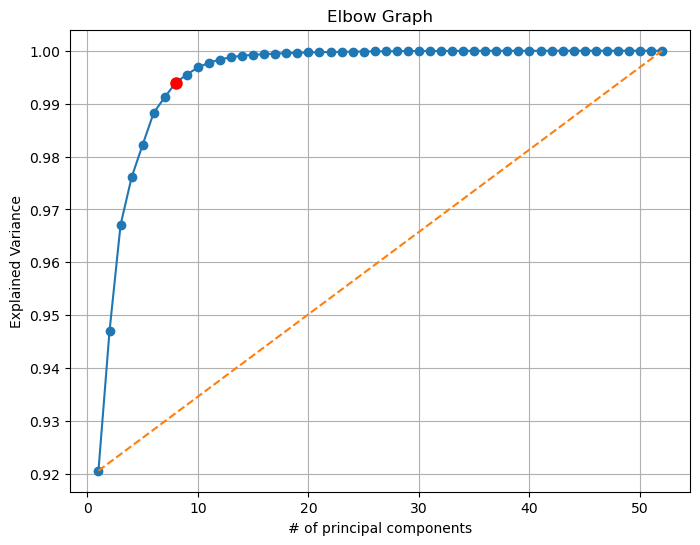

In [25]:
from scipy.spatial.distance import euclidean

points = np.array(list(zip(n_componenti_median,varianza_spiegata_median)))
points

first_point = points[0]
last_point = points[-1]

chord_length = euclidean(first_point, last_point)
distances = []
for point in points:
    distance = np.abs(np.cross(last_point - first_point, first_point - point)) / chord_length
    distances.append(distance)

max_distance_index = np.argmax(distances)
points[max_distance_index][0]
num_components_pca = int(points[max_distance_index][0])
num_components_pca

plt.figure(figsize=(8, 6))
plt.plot(n_componenti_median, varianza_spiegata_median, marker='o')
plt.plot([1,len(varianza_spiegata_median)],[varianza_spiegata_median[0],varianza_spiegata_median[-1]], linestyle='--', label="Rope")
plt.plot(points[max_distance_index][0],points[max_distance_index][1], marker='o', markersize=8, color="red", label="Optimal Components")
plt.xlabel('# of principal components')
plt.ylabel('Explained Variance')
plt.title('Elbow Graph')
plt.grid(True)
plt.show()

#### PCA

In [93]:
pca_median = PCA(n_components=num_components_pca)
x_train_median_pca = pca_median.fit(x_train_median).transform(x_train_median)
x_train_median_pca

array([[-4.37225315e+00, -1.29571063e+01, -2.31654909e+01,
        -5.59316165e+00, -5.64396001e+00, -1.58264017e+00,
        -3.39775056e-01,  1.55357004e+00],
       [-4.33058621e+01,  5.79808654e+01,  8.92079458e+00,
        -1.09284456e+00,  3.52310310e+00,  6.21707215e+00,
        -2.06168663e+00, -4.16571631e+00],
       [-3.48318510e+01,  5.73660441e+01,  1.68709096e+01,
         9.07274980e+00,  5.92992107e-01,  2.33260645e+00,
         8.35053981e+00, -8.35084480e+00],
       [-2.99074333e+01, -2.63599402e+01,  1.91783892e+01,
         3.23463460e+01,  1.11230609e+01,  1.05229624e+01,
        -5.90752359e+00, -1.27643300e+01],
       [-2.33409852e+01, -8.21313862e+00,  2.19842217e+01,
        -2.07865350e+01, -1.14123178e+00,  2.65268978e+00,
        -1.28048329e+01, -7.93219123e-01],
       [-3.98510492e+01,  4.51371734e+01,  1.31482034e+01,
        -5.90180294e+00, -6.18139679e+00,  4.76613443e+00,
         5.26654719e+00, -1.35175560e+00],
       [-3.45714995e+01, -2.454148

## Try different models

In [94]:
X_w_median = pd.DataFrame(x_train_median_pca)
Y_w_median = y_train_median

X_w_median.columns = [f'PC{i+1}' for i in range(X_w_median.shape[1])]
X_w_median = X_w_median.transpose()
X_w_median.columns = name_sample_train_median
X_w_median = X_w_median.transpose()

all_performance = []

X_w_median

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
260522_LC 443_POS_RC7_1_5391,-4.372253,-12.957106,-23.165491,-5.593162,-5.643960,-1.582640,-0.339775,1.553570
260522_LC 365_POS_GC2_1_5344,-43.305862,57.980865,8.920795,-1.092845,3.523103,6.217072,-2.061687,-4.165716
260522_LC 351_POS_GB2_1_5334,-34.831851,57.366044,16.870910,9.072750,0.592992,2.332606,8.350540,-8.350845
260522_LC 431_POS_RB8_1_5384,-29.907433,-26.359940,19.178389,32.346346,11.123061,10.522962,-5.907524,-12.764330
260522_LC 350_POS_GA6_1_5330,-23.340985,-8.213139,21.984222,-20.786535,-1.141232,2.652690,-12.804833,-0.793219
...,...,...,...,...,...,...,...,...
260522_HC 021_POS_RA7_1_5375,-34.033680,-9.563582,6.711225,31.344501,14.273691,-8.444758,2.778071,13.559818
260522_HC 018_POS_GE1_1_5360,-33.381873,-4.576751,13.430185,5.361618,1.067901,-12.590617,10.122601,3.633101
260522_HC 016_POS_GD1_1_5351,-33.532243,-14.665220,3.175855,-8.259729,0.867705,-7.469616,1.157057,7.153343
260522_HC 09_POS_BE8_1_5324,-31.494552,-9.609995,28.402814,-5.258782,5.423738,2.368712,-6.290812,-0.463751


Prepare Test

In [95]:
# autoscaling on test set
x_test_median_centered = (x_test_median.sub(mean_median,axis=1)).div(std_median,axis=1)
x_test_median_centered_pca = pca_median.transform(x_test_median_centered)

x_test_median_centered_pca = pd.DataFrame(x_test_median_centered_pca)
x_test_median_centered_pca.columns = [f'PC{i+1}' for i in range(x_test_median_centered_pca.shape[1])]
x_test_median_centered_pca = x_test_median_centered_pca.transpose()
x_test_median_centered_pca.columns = name_sample_test_median
x_test_median_centered_pca = x_test_median_centered_pca.transpose()

### Try a Logistic Regression

In [96]:
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt
from imblearn.over_sampling import BorderlineSMOTE


loo = LeaveOneOut()

performance_scores = []
performance_scores_balanced = []
i = 0
# Itera attraverso i fold
for train_index, val_index in loo.split(X_w_median):
    i+=1
    
    train_x_temp, test_x_temp = X_w_median.iloc[train_index],X_w_median.iloc[val_index]
    train_y_temp, test_y_temp = Y_w_median.iloc[train_index],Y_w_median.iloc[val_index]
    
    # print("FOLD %d" %i)
    #ribilanciamento
    bls = BorderlineSMOTE(random_state=99)
    train_x_temp,train_y_temp = bls.fit_resample(train_x_temp,train_y_temp)
    # print(train_y_temp.value_counts())

    # normalizzazione
    mean_median_temp= train_x_temp.mean(axis=0)
    std_median_temp = train_x_temp.std(axis=0)
    train_x_temp = (train_x_temp.sub(mean_median_temp,axis=1)).div(std_median_temp,axis=1)

    test_x_temp = (test_x_temp.sub(mean_median_temp,axis=1)).div(std_median_temp,axis=1)
    
    lm = LogisticRegression(penalty=None, class_weight='balanced', multi_class='auto',max_iter=10000, n_jobs=4, solver='newton-cg') # penalty{‘l1’, ‘l2’, ‘elasmediannet’, None}; multi_class{‘auto’, ‘ovr’, ‘multinomial’}
    
    lm.fit(train_x_temp, train_y_temp)
    
    predicted_y_temp = lm.predict(test_x_temp)

    # Calcola e memorizza la misura delle prestazioni (es. accuratezza)
    accuracy_temp = np.round(mt.accuracy_score(test_y_temp.values,predicted_y_temp)*100,2)
    performance_scores.append(accuracy_temp)
    balanced_accuracy_temp = np.round(mt.balanced_accuracy_score(test_y_temp.values,predicted_y_temp)*100,2)
    performance_scores_balanced.append(balanced_accuracy_temp)
    
mean_accuracy_temp = sum(performance_scores)/i
mean_accuracy_balanced_temp = sum(performance_scores_balanced)/i

print("L'accuracy è: ", mean_accuracy_temp, "\nLa balanced_accuracy è: ", mean_accuracy_balanced_temp)

all_performance = [{"Median":{
    "LogisticRegression_Validation": {
        "BorderlineSMOTE": mean_accuracy_balanced_temp
    }
}}]

/Users/bvs/opt/anaconda3/envs/AI4Omics/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2394: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


/Users/bvs/opt/anaconda3/envs/AI4Omics/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2394: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/Users/bvs/opt/anaconda3/envs/AI4Omics/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2394: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/Users/bvs/opt/anaconda3/envs/AI4Omics/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2394: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/Users/bvs/opt/anaconda3/envs/AI4Omics/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2394: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/Users/bvs/opt/anaconda3/envs/AI4Omics/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2394: UserWarning: y_pred contains

L'accuracy è:  84.50704225352112 
La balanced_accuracy è:  84.50704225352112


##### Try on test set

In [97]:
predicted_y_test = lm.predict(x_test_median_centered_pca)
balanced_accuracy = np.round(mt.balanced_accuracy_score(y_test_median,predicted_y_test)*100,2)
all_performance[0]["Median"]["LogistcRegression_Test"]= {"BorderlineSMOTE":balanced_accuracy}
balanced_accuracy

33.33

Show the error in Logistic Regression

The errors were made on:  [72 73 75 79 82 85 88 92 93 97]


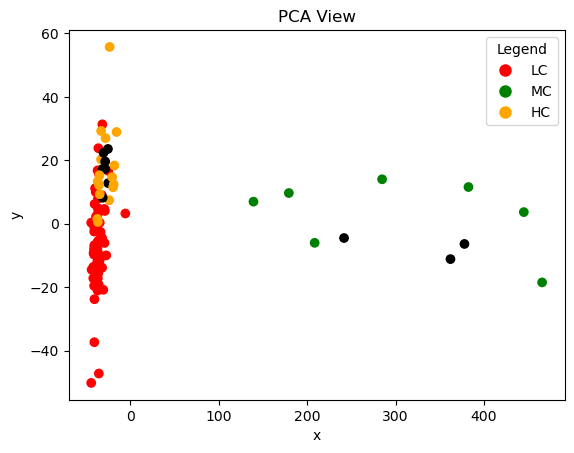

In [98]:
show_error_lr = pd.DataFrame({"Predict":predicted_y_test, "Real":y_test_median})
errors_name = show_error_lr[show_error_lr["Predict"] != show_error_lr["Real"]].index
errors_name

df_score_view_noqc = df_score_view.drop([0,1,2,3])

error_index = (df_score_view_noqc[df_score_view_noqc["Sample"].isin(errors_name)].index) - 4
print("The errors were made on: ",error_index.values)
colors_with_error = colors_after_drop.copy()
colors_with_error = np.delete(colors_with_error,[0,1,2,3])
colors_with_error[error_index] = "black"

plt.scatter(df_score_view_noqc["Score View X"], df_score_view_noqc["Score View Y"], c=colors_with_error)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', label='LC', markerfacecolor='red', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='MC', markerfacecolor='green', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='HC', markerfacecolor='orange', markersize=10),
], title='Legend')
plt.title('PCA View')
plt.show()

### SVM

In [99]:
from sklearn.model_selection import LeaveOneOut
from sklearn.svm import SVC
from sklearn import metrics as mt
from imblearn.over_sampling import BorderlineSMOTE

loo = LeaveOneOut()

performance_scores = []
performance_scores_balanced = []
i = 0
# Itera attraverso i fold
for train_index, val_index in loo.split(X_w_median):
    i+=1
    train_x_temp, test_x_temp = X_w_median.iloc[train_index],X_w_median.iloc[val_index]
    train_y_temp, test_y_temp = Y_w_median.iloc[train_index],Y_w_median.iloc[val_index]
    
    # balancing
    train_x_temp,train_y_temp = BorderlineSMOTE(random_state=99).fit_resample(train_x_temp,train_y_temp)
    
   
    # normalization
    mean_median_temp= train_x_temp.mean(axis=0)
    std_median_temp = train_x_temp.std(axis=0)
    train_x_temp = (train_x_temp.sub(mean_median_temp,axis=1)).div(std_median_temp,axis=1)

    test_x_temp = (test_x_temp.sub(mean_median_temp,axis=1)).div(std_median_temp,axis=1)
    
    model_svc = SVC(C=1.0, kernel = "linear", gamma = "scale")
    model_svc.fit(train_x_temp,train_y_temp)
    
    predicted_y_temp = model_svc.predict(test_x_temp)
    
    accuracy_temp = np.round(mt.accuracy_score(test_y_temp,predicted_y_temp)*100,2)
    performance_scores.append(accuracy_temp)
    balanced_accuracy_temp = np.round(mt.balanced_accuracy_score(test_y_temp,predicted_y_temp)*100,2)
    performance_scores_balanced.append(balanced_accuracy_temp)
    
mean_accuracy_temp = sum(performance_scores)/i
mean_accuracy_balanced_temp = sum(performance_scores_balanced)/i

print("L'accuracy è: ", mean_accuracy_temp, "%\nLa balanced_accuracy è: ", mean_accuracy_balanced_temp,"%")

all_performance[0]["Median"]["SVM_Validation"]= {"BorderlineSMOTE":mean_accuracy_balanced_temp}

/Users/bvs/opt/anaconda3/envs/AI4Omics/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2394: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/Users/bvs/opt/anaconda3/envs/AI4Omics/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2394: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/Users/bvs/opt/anaconda3/envs/AI4Omics/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2394: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/Users/bvs/opt/anaconda3/envs/AI4Omics/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2394: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/Users/bvs/opt/anaconda3/envs/AI4Omics/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2394: UserWarning: y_pred contains

L'accuracy è:  87.32394366197182 %
La balanced_accuracy è:  87.32394366197182 %


/Users/bvs/opt/anaconda3/envs/AI4Omics/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2394: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


##### Try on Test

In [100]:
predicted_y_test = model_svc.predict(x_test_median_centered_pca)
balanced_accuracy = np.round(mt.balanced_accuracy_score(y_test_median,predicted_y_test)*100,2)
all_performance[0]["Median"]["SVM_Test"]= {"BorderlineSMOTE":balanced_accuracy}
balanced_accuracy

33.33

Show the error in SVM

The errors were made on:  [72 73 75 79 82 85 88 92 93 97]


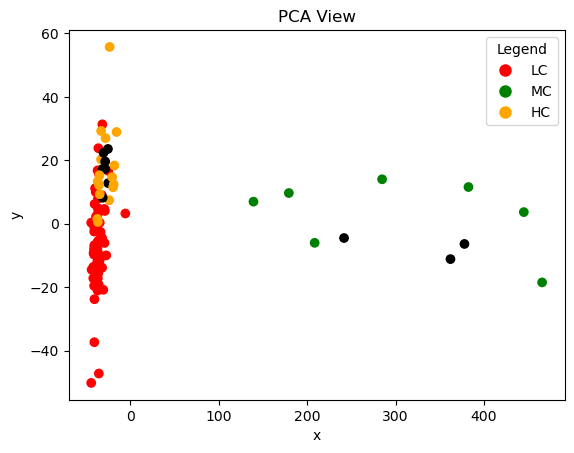

In [101]:
show_error_svm = pd.DataFrame({"Predict":predicted_y_test, "Real":y_test_median})
errors_name = show_error_svm[show_error_svm["Predict"] != show_error_svm["Real"]].index
errors_name

df_score_view_noqc = df_score_view.drop([0,1,2,3])

error_index = (df_score_view_noqc[df_score_view_noqc["Sample"].isin(errors_name)].index) - 4
print("The errors were made on: ",error_index.values)
colors_with_error = colors_after_drop.copy()
colors_with_error = np.delete(colors_with_error,[0,1,2,3])
colors_with_error[error_index] = "black"

plt.scatter(df_score_view_noqc["Score View X"], df_score_view_noqc["Score View Y"], c=colors_with_error)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', label='LC', markerfacecolor='red', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='MC', markerfacecolor='green', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='HC', markerfacecolor='orange', markersize=10),
], title='Legend')
plt.title('PCA View')
plt.show()

### Random Forest

In [102]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics as mt
from sklearn.model_selection import LeaveOneOut
from imblearn.over_sampling import BorderlineSMOTE

loo = LeaveOneOut()

performance_scores = []
performance_scores_balanced = []
i = 0

for train_index, val_index in loo.split(X_w_median):
    i+=1
    train_x_temp, test_x_temp = X_w_median.iloc[train_index],X_w_median.iloc[val_index]
    train_y_temp, test_y_temp = Y_w_median.iloc[train_index],Y_w_median.iloc[val_index]
    
    train_x_temp,train_y_temp = BorderlineSMOTE(random_state=99).fit_resample(train_x_temp,train_y_temp)
    # print(train_y_temp.value_counts())
    # normalizzazione
    mean_median_temp = train_x_temp.mean(axis=0)
    std_median_temp = train_x_temp.std(axis=0)
    train_x_temp = (train_x_temp.sub(mean_median_temp,axis=1)).div(std_median_temp,axis=1)

    test_x_temp = (test_x_temp.sub(mean_median_temp,axis=1)).div(std_median_temp,axis=1)
    
    # print("FOLD %d" %i)
    
    rf_model = RandomForestClassifier(n_estimators=200, random_state=3, max_depth=22, n_jobs=4)
    rf_model.fit(train_x_temp, train_y_temp)
    predicted_y_temp = rf_model.predict(test_x_temp)
    
    accuracy_temp = np.round(mt.accuracy_score(test_y_temp,predicted_y_temp)*100,2)
    performance_scores.append(accuracy_temp)
    balanced_accuracy_temp = np.round(mt.balanced_accuracy_score(test_y_temp,predicted_y_temp)*100,2)
    performance_scores_balanced.append(balanced_accuracy_temp)
    
mean_accuracy_temp = sum(performance_scores)/i
mean_accuracy_balanced_temp = sum(performance_scores_balanced)/i

print("L'accuracy è: ", mean_accuracy_temp, "%\nLa balanced_accuracy è: ", mean_accuracy_balanced_temp,"%")

all_performance[0]["Median"]["RandomForests_Validation"]= {"BorderlineSMOTE":mean_accuracy_balanced_temp}



/Users/bvs/opt/anaconda3/envs/AI4Omics/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2394: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/Users/bvs/opt/anaconda3/envs/AI4Omics/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2394: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/Users/bvs/opt/anaconda3/envs/AI4Omics/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2394: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/Users/bvs/opt/anaconda3/envs/AI4Omics/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2394: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/Users/bvs/opt/anaconda3/envs/AI4Omics/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2394: UserWarning: y_pred contains

L'accuracy è:  85.91549295774648 %
La balanced_accuracy è:  85.91549295774648 %


##### Try on Test

In [103]:
predicted_y_test = rf_model.predict(x_test_median_centered_pca)
balanced_accuracy = np.round(mt.balanced_accuracy_score(y_test_median,predicted_y_test)*100,2)
all_performance[0]["Median"]["RandomForests_Test"]= {"BorderlineSMOTE":balanced_accuracy}
balanced_accuracy

33.33

Gli errori vengono commessi sul campione:  [72 73 75 79 82 85 88 92 93 97]


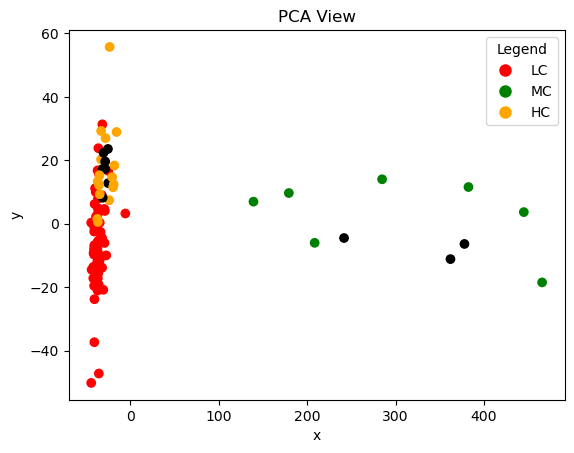

In [104]:
show_error_rf = pd.DataFrame({"Predict":predicted_y_test, "Real":y_test_median})
errors_name = show_error_rf[show_error_rf["Predict"] != show_error_rf["Real"]].index
errors_name

df_score_view_noqc = df_score_view.drop([0,1,2,3])

len(df_score_view_noqc)

df_score_view_noqc

error_index = (df_score_view_noqc[df_score_view_noqc["Sample"].isin(errors_name)].index) - 4
print("Gli errori vengono commessi sul campione: ",error_index.values)
colors_with_error = colors_after_drop.copy()
colors_with_error = np.delete(colors_with_error,[0,1,2,3])
len(colors_with_error)
colors_with_error[error_index] = "black"

plt.scatter(df_score_view_noqc["Score View X"], df_score_view_noqc["Score View Y"], c=colors_with_error)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', label='LC', markerfacecolor='red', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='MC', markerfacecolor='green', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='HC', markerfacecolor='orange', markersize=10),
], title='Legend')
plt.title('PCA View')
plt.show()

## Write on file

In [105]:
import json
file_path = "output_metaboloma_models.txt"
with open(file_path, "a") as file:
    json.dump(all_performance, file, indent=4)